# Практична робота №8

## Тема. Жадібні алгоритми. Наближене розв’язання екстремальних задач.
## Мета: набути практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.

## 1. Опрацювати короткі теоретичні відомості.

## 2. Розв’язати задачу комівояжера для графа, заданого варіантом, використовуючи код, наведений вище.

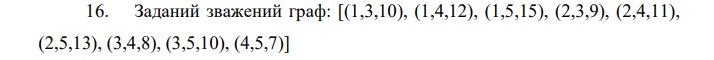

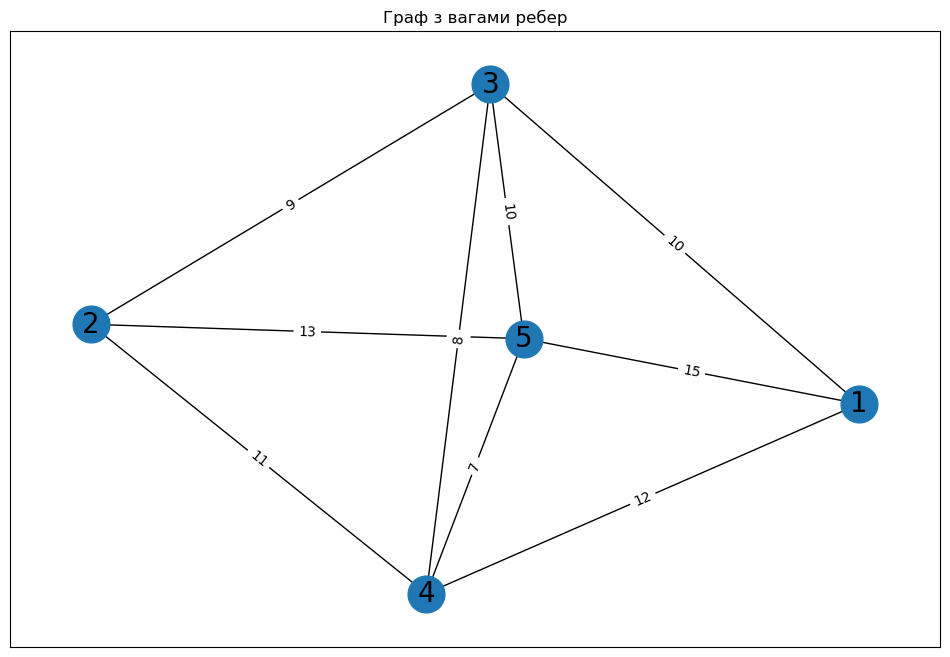


--- Відстані між вузлами ---
Відстань між 1 і 2: Немає прямого ребра
Відстань між 1 і 3: 10
Відстань між 1 і 4: 12
Відстань між 1 і 5: 15
Відстань між 2 і 3: 9
Відстань між 2 і 4: 11
Відстань між 2 і 5: 13
Відстань між 3 і 4: 8
Відстань між 3 і 5: 10
Відстань між 4 і 5: 7
---------------------------

Оптимальний маршрут: [1, 3, 2, 5, 4, 1]. Його вартість = 51


In [10]:
from itertools import permutations
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import show 
INFINITY = float('inf') 
G = None 
def get_path_length(path):
    path_length = 0
    for i, v1 in enumerate(path):
        v2 = path[(i + 1) % len(path)]
        if not G.has_edge(v1, v2):
            return INFINITY
        path_length += G[v1][v2]["weight"]
    return path_length
def node_permutations(graph_obj, init_node_index):
    all_nodes_list = list(graph_obj.nodes()) 
    if not (0 <= init_node_index < len(all_nodes_list)):
        raise IndexError(f"Індекс початкової вершини {init_node_index} виходить за межі діапазону (0-{len(all_nodes_list)-1}).")
    init_node_id = all_nodes_list[init_node_index] 
    remaining_nodes = [node for node in all_nodes_list if node != init_node_id]
    return [[init_node_id] + list(p) for p in permutations(remaining_nodes)]
def TSP_BruteForce(graph_obj, init_node_index):
    min_path = None
    min_path_length = INFINITY
    if len(graph_obj.nodes()) < 2:
        return None, "Для туру потрібно щонайменше 2 вершини."
    for path in node_permutations(graph_obj, init_node_index):
        path_length = get_path_length(path) 
        if path_length < min_path_length:
            min_path, min_path_length = path, path_length
    if min_path_length == INFINITY:
        return None, "Не знайдено дійсного шляху (граф може бути роз'єднаним або не мати ребер)."
    return min_path, min_path_length
def print_distances_between_nodes(graph_obj):
    print("\n--- Відстані між вузлами ---")
    nodes = list(graph_obj.nodes()) 
    for i in range(len(nodes)):
        for j in range(i + 1, len(nodes)): 
            node1 = nodes[i]
            node2 = nodes[j]
            if graph_obj.has_edge(node1, node2):
                weight = graph_obj[node1][node2]["weight"]
                print(f"Відстань між {node1} і {node2}: {weight}")
            else:
                print(f"Відстань між {node1} і {node2}: Немає прямого ребра")
    print("---------------------------\n")
if __name__ == '__main__': 
    %matplotlib inline
    plt.figure(figsize=(12, 8)) 
    G = nx.Graph() 
    G.add_nodes_from(range(1, 6)) 
    G.add_weighted_edges_from([(1,3,10), (1,4,12), (1,5,15), (2,3,9), (2,4,11), (2,5,13), 
    (3,4,8), (3,5,10), (4,5,7)]
    )
    pos = nx.spring_layout(G) 
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
    edges = [(u, v) for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, edgelist=edges)
    edge_labels = dict([((u, v,), d['weight'])
    for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Граф з вагами ребер") 
    show() 
    print_distances_between_nodes(G) 
    start_node_index = 0 
    shortest_path_result, shortest_path_cost = TSP_BruteForce(G, start_node_index)
    if shortest_path_result:
        full_path_display = shortest_path_result + [shortest_path_result[0]]
        print("Оптимальний маршрут: {0}. Його вартість = {1}".format(full_path_display, shortest_path_cost))
    else:
        print(f"Помилка при пошуку маршруту: {shortest_path_cost}")

## 3. Обґрунтувати асимптотику для обох алгоритмів, неведену в табл. 1.4.

### В алгоритмі грубої сили ми перебираємо всі можливі варіанти перестановки, швидкість росте неймовірно швидко, так що асимптотик дорівнює O(n!). Алгоритм найближчого сусіда працює прблизно так, як і назвивається, ми вибираємо початкову точку і відвідуємо по черзі всі невідвідані точки, асимптотика - O(n^2).

## 4. Контрольні запитання.

### 1. Це евристичний метод для знаходження наближеного розв’язку екстремальних задач.
### 2. Алгоритм послідовно виконує локально оптимальні вибори, сподіваючись, що вони приведуть до глобально оптимального розв’язку.
### 3. Вони відрізняються шляхом розв'язку задач. Динамічне програмування розв'язує складну задачу, розбиваючи її на простіші підзадачі та запам'ятовує, а жадібний алгоритм робить локально оптимальні вибори не переглядаючи попередні рішення.
### 4. Задача про найкоротший шлях на графі, задача про рюкзак, задача про мінімальне покриття.
### 5. Глобальний оптимальний розв'язок не гарантований, непридатність жадібних алгоритмів для задач з від'ємними вагами/витратами.
### 6. Жадібні алгоритми зазвичай мють доволі високу швидкість, підходять для наближенного розв'язку екстремальних задач, а також є простим в реалізації.

## Висновки

### Під час цієї практичної роботи ми набули практичних навичок застосування деяких жадібних алгоритмів для розв’язання екстремальних задач.